# 读取test.json

In [10]:
import json


with open('/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/single/dev.json', 'r', encoding='utf-8') as file:
    nq_test_data = json.load(file)
print(type(nq_test_data),len(nq_test_data))
print(type(nq_test_data[0]),nq_test_data[0].keys())
print(type(nq_test_data[0]['question']),nq_test_data[0]['question'])
print(type(nq_test_data[0]['answers']),nq_test_data[0]['answers'])
print(type(nq_test_data[0]['ctxs']),len(nq_test_data[0]['ctxs']))
print(nq_test_data[0]['ctxs'][0])

<class 'list'> 8757
<class 'dict'> dict_keys(['question', 'answers', 'ctxs'])
<class 'str'> who sings does he love me with reba
<class 'list'> ['Linda Davis']
<class 'list'> 100
{'id': '7624371', 'title': 'Linda Davis', 'text': 'Linda Davis Linda Kaye Davis (born November 26, 1962) is an American country music singer. Before beginning a career as a solo artist, she had three minor country singles in the charts as one half of the duo Skip & Linda. In her solo career, Davis has recorded five studio albums for major record labels and more than 15 singles. Her highest chart entry is "Does He Love You", her 1993 duet with Reba McEntire, which reached number one on the "Billboard" country charts and won both singers the Grammy for Best Country Vocal Collaboration. Her highest solo chart position', 'score': '90.75005', 'has_answer': True}


In [19]:
import json


with open('/home/syt/project/compressor_500/new_code/experiment/llama32_1b_500to1/output/info.json', 'r', encoding='utf-8') as file:
    info = json.load(file)
print(info[0])
print(info[1])
print(info[2])
print(info[-1])

print(info[1].keys())


{'run_time(hours)': 0.00025120264954037137, 'total_steps': 13375, 'steps': 0.125, 'training_loss': {'ae_loss': 4.34375, 'lm_loss': 4.90625}, 'learning_rate': 3.3333333333333335e-07}
{'run_time(hours)': 0.0003253234757317437, 'total_steps': 13375, 'steps': 0.25, 'training_loss': {'ae_loss': 4.15625, 'lm_loss': 4.25}, 'learning_rate': 3.3333333333333335e-07}
{'run_time(hours)': 0.00037752224339379203, 'total_steps': 13375, 'steps': 0.375, 'training_loss': {'ae_loss': 3.203125, 'lm_loss': 3.140625}, 'learning_rate': 3.3333333333333335e-07}
{'run_time(hours)': 1.5500772907998828, 'total_steps': 13375, 'steps': 3000.0, 'training_loss': {'ae_loss': 2.21875, 'lm_loss': 2.484375}, 'learning_rate': 0.0001}
dict_keys(['run_time(hours)', 'total_steps', 'steps', 'training_loss', 'learning_rate'])


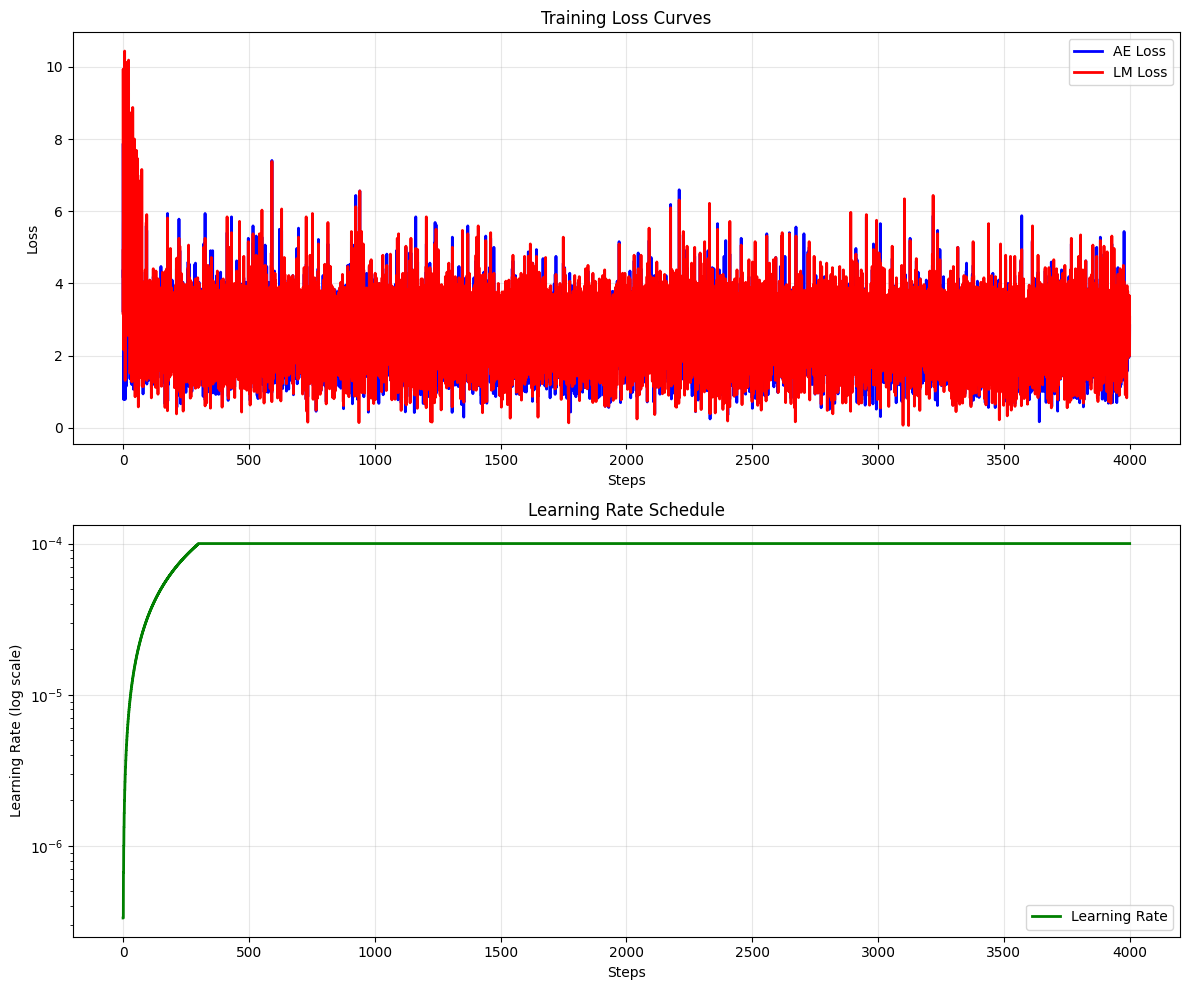

总数据点数量: 32000
AE Loss范围: 0.1660 - 8.3750
LM Loss范围: 0.0630 - 10.4375
最终AE Loss: 2.8281
最终LM Loss: 3.0625


In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np

# 读取JSON文件
with open('/home/syt/project/compressor_500/new_code/experiment/llama32_1b_500to1/output/info.json', 'r', encoding='utf-8') as file:
    info = json.load(file)

# 提取数据
steps = []
ae_losses = []
lm_losses = []
learning_rates = []

for entry in info:
    steps.append(entry['steps'])
    ae_losses.append(entry['training_loss']['ae_loss'])
    lm_losses.append(entry['training_loss']['lm_loss'])
    learning_rates.append(entry['learning_rate'])

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 绘制loss曲线
ax1.plot(steps, ae_losses, 'b-', label='AE Loss', linewidth=2)
ax1.plot(steps, lm_losses, 'r-', label='LM Loss', linewidth=2)
ax1.set_xlabel('Steps')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss Curves')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 绘制学习率曲线
ax2.semilogy(steps, learning_rates, 'g-', label='Learning Rate', linewidth=2)
ax2.set_xlabel('Steps')
ax2.set_ylabel('Learning Rate (log scale)')
ax2.set_title('Learning Rate Schedule')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印一些统计信息
print(f"总数据点数量: {len(steps)}")
print(f"AE Loss范围: {min(ae_losses):.4f} - {max(ae_losses):.4f}")
print(f"LM Loss范围: {min(lm_losses):.4f} - {max(lm_losses):.4f}")
print(f"最终AE Loss: {ae_losses[-1]:.4f}")
print(f"最终LM Loss: {lm_losses[-1]:.4f}")

In [ ]:
import json


with open('/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/single/dev.json', 'r', encoding='utf-8') as file:
    nq_test_data = json.load(file)
# print(type(nq_test_data),len(nq_test_data))
# print(type(nq_test_data[0]),nq_test_data[0].keys())
# print(type(nq_test_data[0]['question']),nq_test_data[0]['question'])
# print(type(nq_test_data[0]['answers']),nq_test_data[0]['answers'])
# print(type(nq_test_data[0]['ctxs']),len(nq_test_data[0]['ctxs']))
# print(nq_test_data[0]['ctxs'][0])

# 读取jsonl文件

In [ ]:
#jsonl 文件读取

import json

# with open('/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/qwen14b/ctx512_mem2/prepared_train_dev_data.jsonl', 'r', encoding='utf-8') as file:
with open('/home/syt/project/compressor_500/pretrain/output/long_text.json', 'r', encoding='utf-8') as file:
    data = [json.loads(line) for line in file if line.strip()]
print(len(data))
print(data[0])
print(data[1])
print(data[2])
print(data[3])



# 读取 mem 内信息

In [1]:
import torch

# 基本读取方式
data = torch.load(r'/home/syt/project/Accelerate_RAG/multi_gpu/dataset/nq_dpr/qwen14b/ctx512_mem2/test_mem.pt')
print(type(data),len(data))
print(type(data[0]),len(data[0]))
print(data[0].keys())
print(data[0]['mem'],data[0]['question'])

"""
输出:
<class 'dict'> 3610
<class 'dict'> 2
dict_keys(['mem', 'question'])
tensor([[ 0.0547,  0.0554, -0.0850,  ..., -0.0067,  0.0141, -0.0376],
        [ 0.0469, -0.0664, -0.0491,  ...,  0.0120, -0.0317, -0.0192]]) who got the first nobel prize in physics

"""

<class 'dict'> 3610
<class 'dict'> 2
dict_keys(['mem', 'question'])
tensor([[ 0.0547,  0.0554, -0.0850,  ..., -0.0067,  0.0141, -0.0376],
        [ 0.0469, -0.0664, -0.0491,  ...,  0.0120, -0.0317, -0.0192]]) who got the first nobel prize in physics


'\n输出:\n'

# 读取特殊token

In [3]:
from transformers import AutoTokenizer

def show_special_tokens(model_id: str):
    tk = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

    print(f"\n=== {model_id} ===")
    # 1) 汇总映射（常见的 bos/eos/pad/unk 及其 id）
    print("special_tokens_map:", tk.special_tokens_map)

    print("-"*20)
    print("special_tokens_map_extended:", tk.special_tokens_map_extended)
    print("-"*20)
    # 2) 所有注册的特殊 token 及其 id

    print("all_special_tokens:", tk.all_special_tokens)

    print("-"*20)
    print("all_special_ids:", tk.all_special_ids)
    print("-"*20)
    # 3) 聊天模板（若存在），便于查看用到哪些标记
    if hasattr(tk, "chat_template") and tk.chat_template:
        print("\n--- chat_template ---")
        print(tk.chat_template)

print("--"*20)
show_special_tokens("/home/syt/project/model/qwen3/Qwen/Qwen3-14B")
print("--"*20)


----------------------------------------

=== /home/syt/project/model/qwen3/Qwen/Qwen3-14B ===
special_tokens_map: {'eos_token': '<|im_end|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<|box_end|>', '<|quad_start|>', '<|quad_end|>', '<|vision_start|>', '<|vision_end|>', '<|vision_pad|>', '<|image_pad|>', '<|video_pad|>']}
--------------------
special_tokens_map_extended: {'eos_token': AddedToken("<|im_end|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'pad_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<|box_end|>', '<|quad_start|>', '<|quad_end|>', '<|vision_start|>', '<|vision_end|>', '<|vision_pad|>', '<|image_pad|>', '<|video_pad|>']}
-----------

In [4]:
show_special_tokens("/home/syt/project/Cram/model/model_scope_model/llama3_1_8b_instruct")


=== /home/syt/project/Cram/model/model_scope_model/llama3_1_8b_instruct ===
special_tokens_map: {'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>'}
--------------------
special_tokens_map_extended: {'bos_token': AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'eos_token': AddedToken("<|eot_id|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True)}
--------------------
all_special_tokens: ['<|begin_of_text|>', '<|eot_id|>']
--------------------
all_special_ids: [128000, 128009]
--------------------

--- chat_template ---
{{- bos_token }}
{%- if custom_tools is defined %}
    {%- set tools = custom_tools %}
{%- endif %}
{%- if not tools_in_user_message is defined %}
    {%- set tools_in_user_message = true %}
{%- endif %}
{%- if not date_string is defined %}
    {%- set date_string = "26 Jul 2024" %}
{%- endif %}
{%- if not tools is defined %}
    {%- set tools = none %}
{%- endif %}

{

In [5]:
show_special_tokens("/home/syt/project/Cram/model/model_scope_model/llama3_2_3b_instruct")


=== /home/syt/project/Cram/model/model_scope_model/llama3_2_3b_instruct ===
special_tokens_map: {'bos_token': '<|begin_of_text|>', 'eos_token': '<|eot_id|>'}
--------------------
special_tokens_map_extended: {'bos_token': AddedToken("<|begin_of_text|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True), 'eos_token': AddedToken("<|eot_id|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True)}
--------------------
all_special_tokens: ['<|begin_of_text|>', '<|eot_id|>']
--------------------
all_special_ids: [128000, 128009]
--------------------

--- chat_template ---
{{- bos_token }}
{%- if custom_tools is defined %}
    {%- set tools = custom_tools %}
{%- endif %}
{%- if not tools_in_user_message is defined %}
    {%- set tools_in_user_message = true %}
{%- endif %}
{%- if not date_string is defined %}
    {%- if strftime_now is defined %}
        {%- set date_string = strftime_now("%d %b %Y") %}
    {%- else %}
        {%- set da

In [1]:
import torch

data=torch.load("/home/syt/project/compressor_500/new_code/pretrain/output/train_Llama-3.2-1B-Instruct_320000samples_510-2040len.pt")

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x756f1b25e320>>
Traceback (most recent call last):
  File "/home/syt/miniconda3/envs/UPL/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

In [2]:
import torch

data=torch.load("/home/syt/project/compressor_500/new_code/pretrain/output/eval_Llama-3.2-1B-Instruct_320000samples_510-2040len.pt")

In [3]:
type(data),len(data)


(list, 1000)

In [6]:
data[0].keys()

dict_keys(['inputs', 'ae_target', 'lm_target'])

In [8]:
type(data[0]['inputs'])

torch.Tensor

In [13]:
len(data[451]['inputs'])

946